# How to use H1st Ensemble ?
1. We will first define/train two h1st example models (You can use N different models with h1st Ensemble API).
2. We will import RandomForestStackEnsembleClassifier from h1st.
3. Define load_data and prep_data methods of RandomForestStackEnsembleClassifier
4. Train and evaluate the ensemble  

In this AI App template, we will use "default of credit card clients Data Set" which has 23 features and a target (2 classes). The data set is provided by Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

In [1]:
# coding: utf-8
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")
sys.path.append("../..")

In [3]:
import os

import pandas as pd

import h1st.core as h1
h1.init()

from app.ai.sklearn_smv_classifier import SklearnSVMClassifier
from app.ai.tensorflow_mlp_classifier import TensorflowMLPClassifier
from app.ai import config
from app.ai.utils import prepare_train_test_data

## Submodel_1 - SVM

In [4]:
h1_sk_svm = SklearnSVMClassifier()
data = h1_sk_svm.load_data()

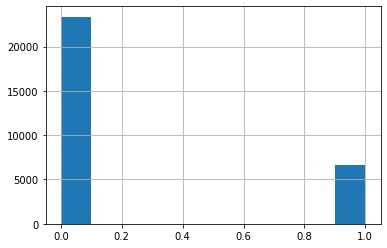

In [5]:
h1_sk_svm.explore(data)

In [6]:
prepared_data = h1_sk_svm.prep(data)

INFO:app.ai.utils:(20100, 23), (9900, 23), (20100, 1), (9900, 1)


In [7]:
h1_sk_svm.train(prepared_data)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [8]:
h1_sk_svm.evaluate(prepared_data)
h1_sk_svm.metrics

{'accuracy': 0.8143434343434344}

In [9]:
h1_sk_svm.persist('my_sk_svm')

2021-02-01 13:45:47,295 INFO h1st.model_repository.model_repository: Saving metrics property...
INFO:h1st.model_repository.model_repository:Saving metrics property...
2021-02-01 13:45:47,297 INFO h1st.model_repository.model_repository: Saving stats property...
INFO:h1st.model_repository.model_repository:Saving stats property...
2021-02-01 13:45:47,298 INFO h1st.model_repository.model_repository: Saving model property...
INFO:h1st.model_repository.model_repository:Saving model property...


'my_sk_svm'

## Submodel_2 - Multi-Layer Perceptron (MLP)

In [10]:
h1_tf_mlp = TensorflowMLPClassifier()
data = h1_tf_mlp.load_data()
prepared_data = h1_tf_mlp.prep(data)

INFO:app.ai.utils:(20100, 23), (9900, 23), (20100, 1), (9900, 1)


In [11]:
h1_tf_mlp.train(prepared_data)

In [12]:
h1_tf_mlp.evaluate(prepared_data)
h1_tf_mlp.metrics

INFO:app.ai.tensorflow_mlp_classifier:(9900, 1), (9900, 1)


{'accuracy': 0.8164646464646464}

In [13]:
h1_tf_mlp.persist('my_tf_mlp')

2021-02-01 13:45:52,285 INFO h1st.model_repository.model_repository: Saving metrics property...
INFO:h1st.model_repository.model_repository:Saving metrics property...
2021-02-01 13:45:52,286 INFO h1st.model_repository.model_repository: Saving stats property...
INFO:h1st.model_repository.model_repository:Saving stats property...
2021-02-01 13:45:52,288 INFO h1st.model_repository.model_repository: Saving model property...
INFO:h1st.model_repository.model_repository:Saving model property...


'my_tf_mlp'

## H1ST StackEnsemble

In [14]:
from app.ai.classifier_ensemble import RFClassifierStackEnsemble

In [15]:
# class RandomForestClassifierStackEnsemble(h1.RandomForestClassifierStackEnsemble):
#     def load_data(self,):
#         df = pd.read_excel(config.DATA_PATH, header=1)
#         return df

#     def prep(self, loaded_data):
#         return prepare_train_test_data(loaded_data)

rf_stack_ensemble = RFClassifierStackEnsemble(
    [SklearnSVMClassifier().load('my_sk_svm'), TensorflowMLPClassifier().load('my_tf_mlp')],
    # 'submodel_predict_input_key'= 'X', 'submodel_predict_output_key'='predictions') ## by default
)

2021-02-01 13:45:52,412 INFO h1st.model_repository.model_repository: Loading version my_sk_svm ....
INFO:h1st.model_repository.model_repository:Loading version my_sk_svm ....
2021-02-01 13:45:52,447 INFO h1st.model_repository.model_repository: Loading version my_tf_mlp ....
INFO:h1st.model_repository.model_repository:Loading version my_tf_mlp ....


In [16]:
data = rf_stack_ensemble.load_data()
prepared_data = rf_stack_ensemble.prep(data)

INFO:app.ai.utils:(20100, 23), (9900, 23), (20100, 1), (9900, 1)


In [17]:
rf_stack_ensemble.train(prepared_data)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [18]:
rf_stack_ensemble.evaluate(
    prepared_data, metrics=['confusion_matrix', 'accuracy'])

In [19]:
rf_stack_ensemble.persist('my_ensemble')
rf_stack_ensemble = None

2021-02-01 13:46:21,870 INFO h1st.model_repository.model_repository: Saving metrics property...
INFO:h1st.model_repository.model_repository:Saving metrics property...
2021-02-01 13:46:21,872 INFO h1st.model_repository.model_repository: Saving stats property...
INFO:h1st.model_repository.model_repository:Saving stats property...
2021-02-01 13:46:21,874 INFO h1st.model_repository.model_repository: Saving model property...
INFO:h1st.model_repository.model_repository:Saving model property...


# Compare the accuracy of Submodels and Ensemble

In [20]:
rf_stack_ensemble = RFClassifierStackEnsemble(
    [SklearnSVMClassifier().load('my_sk_svm'), TensorflowMLPClassifier().load('my_tf_mlp')]).load('my_ensemble')

2021-02-01 13:46:21,998 INFO h1st.model_repository.model_repository: Loading version my_sk_svm ....
INFO:h1st.model_repository.model_repository:Loading version my_sk_svm ....
2021-02-01 13:46:22,032 INFO h1st.model_repository.model_repository: Loading version my_tf_mlp ....
INFO:h1st.model_repository.model_repository:Loading version my_tf_mlp ....
2021-02-01 13:46:22,042 INFO h1st.model_repository.model_repository: Loading version my_ensemble ....
INFO:h1st.model_repository.model_repository:Loading version my_ensemble ....


In [21]:
sk_svm_accuracy = h1_sk_svm.metrics['accuracy']
tf_fc_accuracy = h1_tf_mlp.metrics['accuracy']
ensemble_accuracy = rf_stack_ensemble.metrics['accuracy']

In [22]:
print('sk_svm_accuracy:', sk_svm_accuracy)
print('tf_fc_accuracy:', tf_fc_accuracy)
print('ensemble_accuracy:', ensemble_accuracy)
assert (ensemble_accuracy >= sk_svm_accuracy) & (ensemble_accuracy >= tf_fc_accuracy)

sk_svm_accuracy: 0.8143434343434344
tf_fc_accuracy: 0.8164646464646464
ensemble_accuracy: 0.8178787878787879


# Evalute Ensemble Workflow

In [23]:
from app.ai.workflow import ClassifierEnsembleWorkflow
from sklearn.metrics import accuracy_score

In [24]:
cls_ensemble_workflow = ClassifierEnsembleWorkflow()

2021-02-01 13:46:22,292 INFO h1st.model_repository.model_repository: Loading version my_sk_svm ....
INFO:h1st.model_repository.model_repository:Loading version my_sk_svm ....
2021-02-01 13:46:22,330 INFO h1st.model_repository.model_repository: Loading version my_tf_mlp ....
INFO:h1st.model_repository.model_repository:Loading version my_tf_mlp ....
2021-02-01 13:46:22,340 INFO h1st.model_repository.model_repository: Loading version my_ensemble ....
INFO:h1st.model_repository.model_repository:Loading version my_ensemble ....


In [25]:
pred = cls_ensemble_workflow.predict({"X": prepaed_data['X_test']})

In [28]:
prepared_data['X_test'].shape

(9900, 23)

In [26]:
metrics = accuracy_score(prepared_data['y_test'], pred['predictions'])
print("workflow accuracy:", metrics)

workflow accuracy: 0.8178787878787879


In [29]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
